In [40]:
import xarray
from typing import Optional
import datetime
import numpy

ATTRS ={'time': {'dtype': 'int64',}, # 'units': 'days since 2019-01-01', }, 
        'lon': {'dtype': 'float32', 'valid_min': -180., 'valid_max': 180.,
                'long_name': 'longitude', 'standard_name': 'longitude',
                'units': 'degrees_east'},
        'lat': {'dtype': 'float32', 'valid_min': -90., 'valid_max': 90.,
                'long_name': 'latitude', 'standard_name': 'latitude',
                'units': 'degrees_north'},
        'ugos': {'dtype': 'float32', 'valid_min': -100., 'valid_max': 100.,
                'units': 'm/s',
                'long_name': 'Eastward total velocity',
                },
        'vgos': {'dtype': 'float32', 'valid_min': -100., 'valid_max': 100.,
                'units': 'm/s',
                'long_name': 'Northward total velocity',
                },
                }

COMPLEVEL = 4
ZLIB = True
FV32 = 1.e+20
ENC_FV = {'zlib': ZLIB, 'complevel': COMPLEVEL, '_FillValue': FV32,
          'dtype': 'float32'}
ENC = {'zlib': ZLIB, 'complevel': COMPLEVEL, 'dtype': 'float32'}


def save(ds: xarray.Dataset, listkey: list, file_out: str, 
         ATTR_VARS: Optional[dict] = ATTRS, fillvalue: Optional[float] = FV32):
    encoding = {}
    for key in listkey:
        print(key)
        dic_attr = {}
        if key in ATTR_VARS.keys():
            dic_attr = ATTR_VARS[key]
        ds[key].values[numpy.isnan(ds[key].values)] = fillvalue
        ds = ds.assign({key: (['time', 'lat', 'lon'], ds[key].values,
                            dic_attr)})

        encoding[key] = ENC_FV
        print(ENC_FV)
    for key in ('lon', 'lat', 'time'):
    #for key in ('lon', 'lat'):
        dic_attr = {}
        if key in ATTR_VARS.keys():
            dic_attr = ATTR_VARS[key]
        ds = ds.assign({key: ([key,], ds[key].values,
                            dic_attr)})
        encoding[key] = ENC
    encoding['time']['dtype'] = 'int64'
    encoding['lat']['dtype'] = 'float32'
    encoding['lon']['dtype'] = 'float32'
    
    print(encoding)

    t0 = ds['time'].values[0] - numpy.timedelta64(12, 'h')
    t1 = ds['time'].values[-1] + numpy.timedelta64(12, 'h')

    ds.attrs['title'] = 'multivar_uv'
    ds.attrs['project'] = 'multivar_uv'
    ds.attrs['summary'] = ''
    ds.attrs['references'] = ''
    ds.attrs['institution'] = 'IMT Atlantic'
    ds.attrs['creator_name'] = 'Theo'
    ds.attrs['version_id'] = '0.1'
    ds.attrs['date_created'] = str(datetime.datetime.now())
    ds.attrs['geospatial_lat_min'] = f'{numpy.min(ds["lat"].values)}N'
    ds.attrs['geospatial_lat_max'] = f'{numpy.max(ds["lat"].values)}N'
    ds.attrs['geospatial_lon_min'] = f'{numpy.min(ds["lon"].values)}E'
    ds.attrs['geospatial_lon_max'] = f'{numpy.max(ds["lon"].values)}E'
    ds.attrs['time_coverage_start'] = numpy.datetime_as_string(t0, unit='s')
    ds.attrs['time_coverage_end'] = numpy.datetime_as_string(t1, unit='s')
    ds.to_netcdf(file_out, 'w', format="NETCDF4", encoding=encoding)
    #return ds


In [46]:
import xarray as xr
folder_data = "/Odyssey/private/t22picar/multivar_uv/rec/multivar_mapping_ssh_neurost_sst_w_to_u_v_L4_10y_11d_0m_norm/"
#folder_data = "/Odyssey/private/t22picar/multivar_uv/rec/multivar_mapping_ssh_duacs_sst_w_to_u_v_L4_10y_11d_0m_norm/"
#folder_data = "/Odyssey/private/t22picar/multivar_uv/rec/multivar_mapping_ssh_duacs_sst_w_to_u_v_L4_10y_11d_15m_norm/"
ds_map = xr.open_dataset(folder_data+"test_data.nc")

In [47]:
### FILTER ####
mask = numpy.load('/Odyssey/private/t22picar/2023a_SSH_mapping_OSE/nb_diags_THEO/uv_score_mask/mask_glorys_4th.npy')
mask = mask[numpy.newaxis,:,:]
mask = mask.repeat(365,axis=0)
ds_map = ds_map.where(mask, numpy.nan)

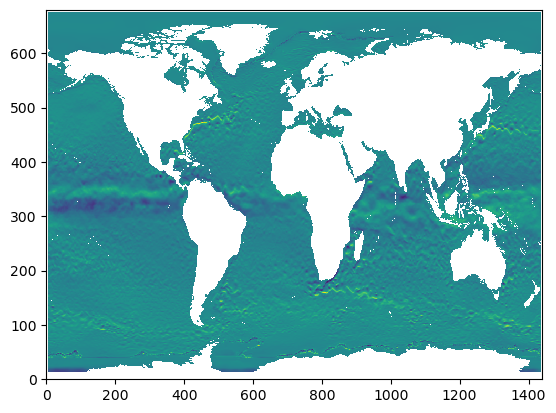

In [48]:
import matplotlib.pyplot as plt
plt.pcolormesh(ds_map.ugos[0])

In [49]:
# Récupérer la liste des variables sans les dimensions
variables = [var for var in ds_map.variables if var not in ds_map.dims]
variables

['ugos', 'vgos']

In [50]:
file_saved = "test_data_filtred.nc"
folder_out = folder_data+file_saved
ds_map = save(ds_map,variables,folder_out)

ugos
{'zlib': True, 'complevel': 4, '_FillValue': 1e+20, 'dtype': 'float32'}
vgos
{'zlib': True, 'complevel': 4, '_FillValue': 1e+20, 'dtype': 'float32'}
{'ugos': {'zlib': True, 'complevel': 4, '_FillValue': 1e+20, 'dtype': 'float32'}, 'vgos': {'zlib': True, 'complevel': 4, '_FillValue': 1e+20, 'dtype': 'float32'}, 'lon': {'zlib': True, 'complevel': 4, 'dtype': 'float32'}, 'lat': {'zlib': True, 'complevel': 4, 'dtype': 'float32'}, 'time': {'zlib': True, 'complevel': 4, 'dtype': 'float32'}}


In [ ]:
ds_map

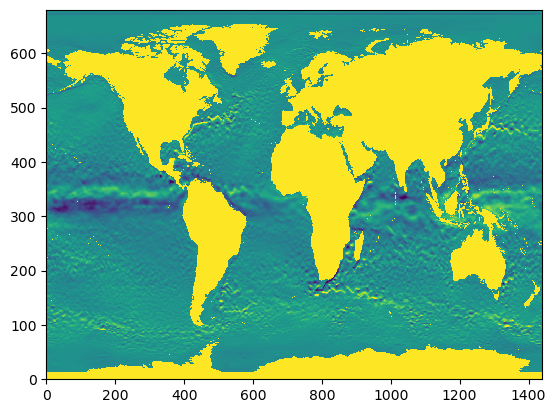

In [63]:
import matplotlib.pyplot as plt
plt.pcolormesh(ds_map.ugos[0],vmin=-1,vmax=1)

In [ ]:
import xarray as xr
folder_data = "/Odyssey/private/t22picar/multivar_uv/rec/multivar_mapping_ssh_duacs_sst_w_to_u_v_L4_10y_11d_15m_norm/"
ds_map = xr.open_dataset(folder_data+"test_data_filtred.nc")
ds_map

<xarray.Dataset> Size: 3GB
Dimensions:  (time: 365, lat: 680, lon: 1440)
Coordinates:
  * lon      (lon) float32 6kB -180.0 -179.7 -179.5 -179.2 ... 179.4 179.7 179.9
  * lat      (lat) float32 3kB -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * time     (time) datetime64[ns] 3kB 2019-01-01 2019-01-02 ... 2019-12-31
Data variables:
    ugos     (time, lat, lon) float32 1GB ...
    vgos     (time, lat, lon) float32 1GB ...
Attributes: (12/14)
    title:                multivar_uv
    project:              multivar_uv
    summary:              
    references:           
    institution:          IMT Atlantic
    creator_name:         Theo
    ...                   ...
    geospatial_lat_min:   -80.0N
    geospatial_lat_max:   90.0N
    geospatial_lon_min:   -180.0E
    geospatial_lon_max:   179.9166717529297E
    time_coverage_start:  2018-12-31T12:00:00
    time_coverage_end:    2019-12-31T12:00:00

In [72]:
ds_map.ugos[0,:,:].values

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.15196984, -0.05239191,  0.0319786 , ...,  0.03983559,
         0.0248622 ,  0.12650591],
       [-0.15312962, -0.11068662, -0.00074825, ...,  0.0435499 ,
         0.03666197,  0.17274429],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)

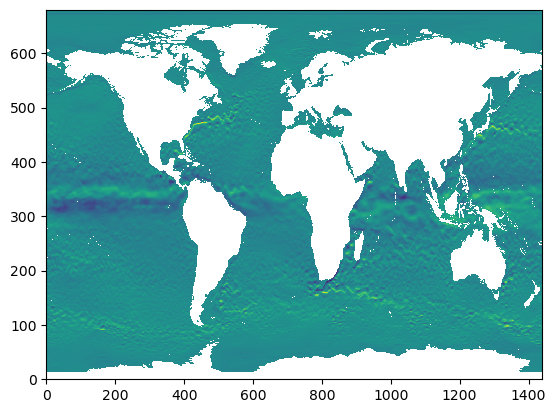

In [73]:
import matplotlib.pyplot as plt
plt.pcolormesh(ds_map.ugos[0])